## Creación del objeto osciloscopio

In [1]:
from utils import *
from osctck import *

TDS2024 = Osctck('USB0::1689::874::C034414::0::INSTR')

## Configuracion del osciloscopio y adquisición de datos

In [23]:
TDS2024.config(channels = (1,),
                 triggerSource = 'EXT',
                 triggerLevel = 0.5,
                 triggerSlope = 'RISE',
                 triggerMode = 'NORM',
                 triggerCoup = 'AC',
                 acquisition = 16,
                 vAutoScale = True)

meas2 = TDS2024()

## Ploteo de resultados

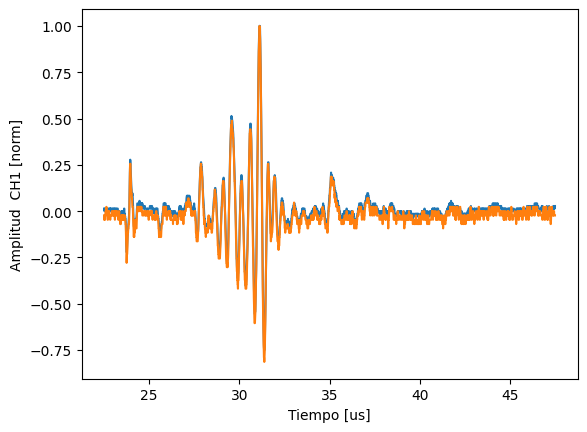

In [20]:
import matplotlib.pyplot as plt

plt.plot(meas[0]*1e6, -1*meas[1]/np.max(np.abs(meas[1]))),plt.plot(meas2[0]*1e6, meas2[1]/np.max(np.abs(meas2[1])))
plt.ylabel('Amplitud  CH1 [norm]')
plt.xlabel('Tiempo [us]')
plt.show()

#plt.plot(meas[0], meas[2])
#plt.ylabel('Amplitud  CH2 [V]')
#plt.xlabel('Tiempo [s]')
#plt.show()

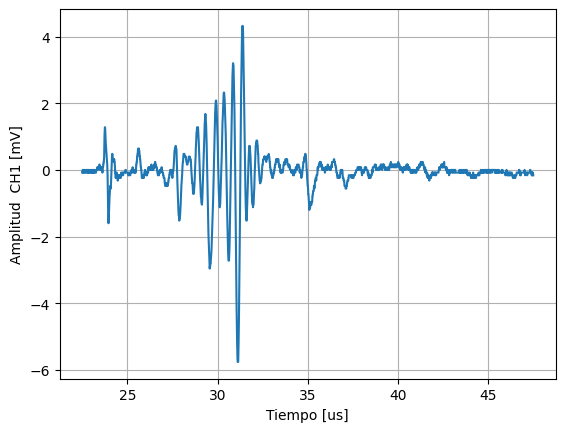

In [18]:
plt.plot(meas[0]*1e6, meas[1]*1e3)
plt.ylabel('Amplitud  CH1 [mV]')
plt.xlabel('Tiempo [us]')
plt.grid()
plt.show()

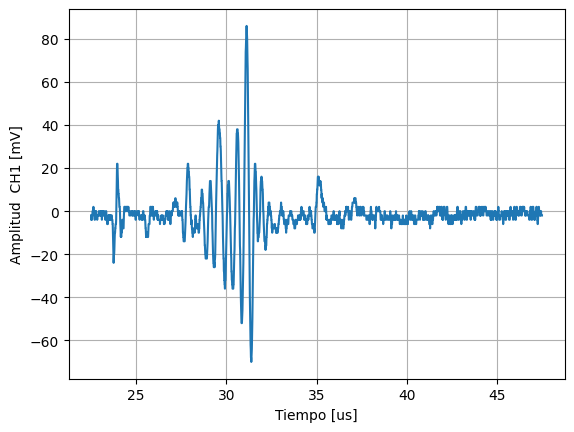

In [15]:
import matplotlib.pyplot as plt

plt.plot(meas2[0]*1e6, meas2[1]*1e3)
plt.ylabel('Amplitud  CH1 [mV]')
plt.xlabel('Tiempo [us]')
plt.grid()
plt.show()

## Guardado de resultados

In [322]:
txtName = getTxtName()
np.savetxt("Mediciones/Campo/" + txtName + ".txt", np.column_stack((meas[0], meas[1])),fmt='%.12f')


Ingrese el nombre del archivo donde guardar resultados:  37


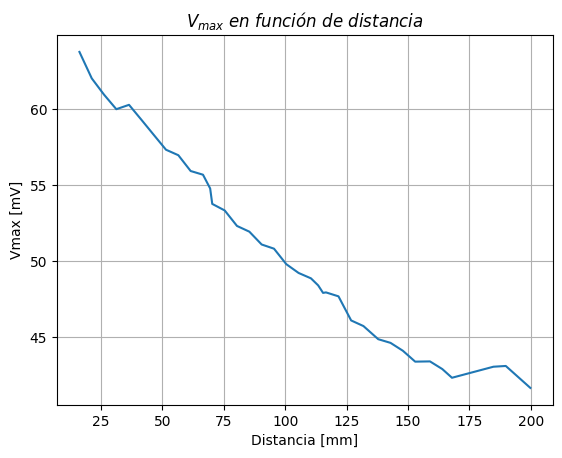

In [323]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert


lt_max = []
lt_time = []
lt_int = []

for i in range(37):
    path = "Mediciones/Campo/{0}.txt".format(i)
    meas = np.loadtxt(path, dtype = float)

    lt_max.append(np.max(meas[:,1]))
    lt_time.append(meas[np.argmax(meas[:,1]),0])
    env = np.abs(hilbert(meas[:,1]))
    lt_int.append(np.trapz(env, meas[:,0]))

arr_time = np.array(lt_time) * 1000 * 1485
arr_max = np.array(lt_max)
arr_int = np.array(lt_int)


# plt.plot(arr_time, ajuste)
plt.plot(arr_time, arr_max * 1000)
plt.ylabel("Vmax [mV]")
plt.xlabel("Distancia [mm]")
plt.title("$V_{max}~en~función~de~distancia$")
plt.grid()
plt.show()

In [12]:
# printTempVel(120.16e3)

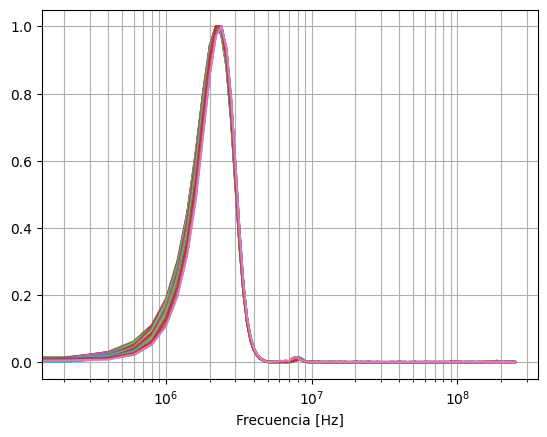

In [332]:
for i in range(37):
    path = "Mediciones/Campo/{0}.txt".format(i)
    meas = np.loadtxt(path, dtype = float)

    x = meas[:,0]
    y = meas[:,1]
    N = len(x)
    T = x[1]-x[0]
    y_f = np.fft.fft(y)
    x_f = np.linspace(0, 1/(2*T), N//2)

    Y = np.abs(y_f[:N//2])
    Y = Y / np.max(Y[1:])

    plt.semilogx(x_f, Y)
    plt.xlabel("Frecuencia [Hz]")
    plt.grid(True, which="both", ls="-")
plt.show()

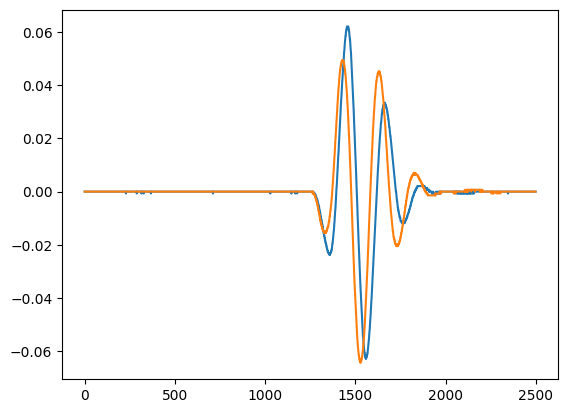

In [344]:
path1 = "Mediciones/Campo/{0}.txt".format(1)
meas1 = np.loadtxt(path1, dtype = float)

path2 = "Mediciones/Campo/{0}.txt".format(37)
meas2 = np.loadtxt(path2, dtype = float)

plt.plot(meas1[:,1])
plt.plot(1.2*meas2[:,1])
plt.show()

